<a href="https://colab.research.google.com/github/SiyumiJayawardhane/CustomerSubscriptionPrediction/blob/main/MachineLearningCourseWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
 # Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import joblib

**1. Load Data**

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/ML/Machine Learning Course Work/bank-additional-full.csv", sep=';')

In [12]:
#Display information
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   4

In [13]:
#Load 5 rows
print("\nFirst 5 rows:")
print(data.head())


First 5 rows:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor

**2. Data preprocessing**

In [14]:
# Replace Unknow with nan
data.replace('unknown', np.nan, inplace=True)

In [15]:
# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [16]:
# Handle missing values
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical features
        data[column].fillna('Unknown', inplace=True)
    else:  # Numerical features
        data[column].fillna(data[column].median(), inplace=True)

<ipython-input-16-fd35bf2c9d52>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-16-fd35bf2c9d52>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [17]:
print("\nMissing values handled:")
print(data.isnull().sum())


Missing values handled:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [18]:
# Check for duplicate rows
print(f"\nNumber of duplicate rows before removal: {data.duplicated().sum()}")


Number of duplicate rows before removal: 12


In [19]:
# Remove duplicate rows
data = data.drop_duplicates()

print(f"Number of duplicate rows after removal: {data.duplicated().sum()}")

Number of duplicate rows after removal: 0


In [20]:
# Encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    if column != 'y':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

In [21]:
# Map target variable to binary
data['y'] = data['y'].map({'yes': 1, 'no': 0})

**3. Correlation Analysis**

In [22]:
print("\nCorrelation Analysis:")
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['y'].sort_values(ascending=False)
print(correlation_with_target)


Correlation Analysis:
y                 1.000000
duration          0.405297
previous          0.230202
poutcome          0.129810
default           0.099210
cons.conf.idx     0.054802
marital           0.044585
education         0.039974
age               0.030381
job               0.025547
day_of_week       0.015970
housing           0.011436
loan             -0.003151
month            -0.006051
campaign         -0.066361
cons.price.idx   -0.136134
contact          -0.144774
emp.var.rate     -0.298289
euribor3m        -0.307740
pdays            -0.324948
nr.employed      -0.354669
Name: y, dtype: float64


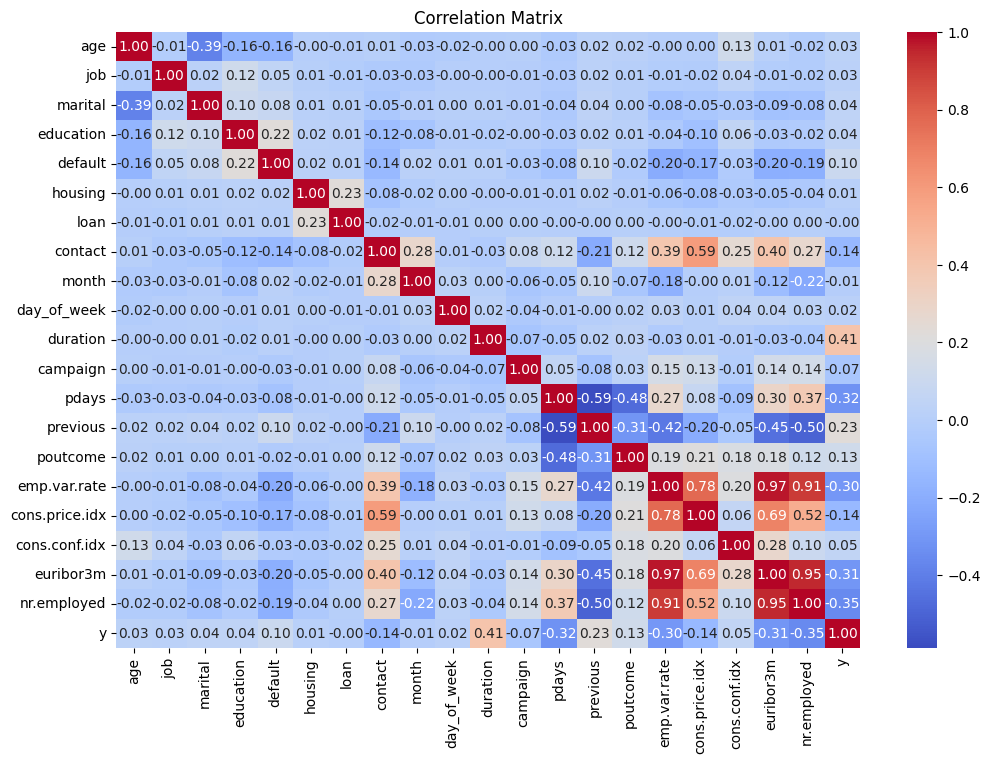

In [23]:
# Visualize correlation with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [24]:
# Drop features with very low correlation
low_correlation_features = correlation_with_target[correlation_with_target.abs() < 0.04].index
print(f"\nDropping low-correlation features: {list(low_correlation_features)}")
data = data.drop(columns=low_correlation_features)
#Handle multicollinearity
columns_to_drop = ['duration', 'default', 'campaign']  # Example based on correlation analysis and domain knowledge
print(f"\nDropping columns due to multicollinearity: {columns_to_drop}")
data = data.drop(columns=columns_to_drop)


Dropping low-correlation features: ['education', 'age', 'job', 'day_of_week', 'housing', 'loan', 'month']

Dropping columns due to multicollinearity: ['duration', 'default', 'campaign']


In [25]:
# Separate features and target
X = data.drop('y', axis=1)
y = data['y']

**4. Handle data imbalance using SMOTE**

In [26]:
# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
print("\nHandling class imbalance with SMOTE...")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


Handling class imbalance with SMOTE...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


**4. Random Forest Hyperparameter Tuning using GridSearchCV**

In [29]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

 **5. Random Forest Classifier**

In [30]:
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)


Training Random Forest Classifier...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [31]:
# Best Parameters
print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)


Best Parameters from GridSearchCV:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [32]:
# Best Model
best_rf_model = grid_search.best_estimator_

In [33]:
# Predictions and Evaluation
rf_predictions = best_rf_model.predict(X_test)

In [34]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_auc = roc_auc_score(y_test, rf_predictions)
rf_accuracy, rf_auc

(0.8477416221466731, 0.6897486148548796)

In [35]:
print("\nRandom Forest Performance After Hyperparameter Tuning:")
print(classification_report(y_test, rf_predictions))
print(f"AUC-ROC Score: {rf_auc:.2f}")


Random Forest Performance After Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      7265
           1       0.38      0.48      0.43       971

    accuracy                           0.85      8236
   macro avg       0.66      0.69      0.67      8236
weighted avg       0.86      0.85      0.86      8236

AUC-ROC Score: 0.69


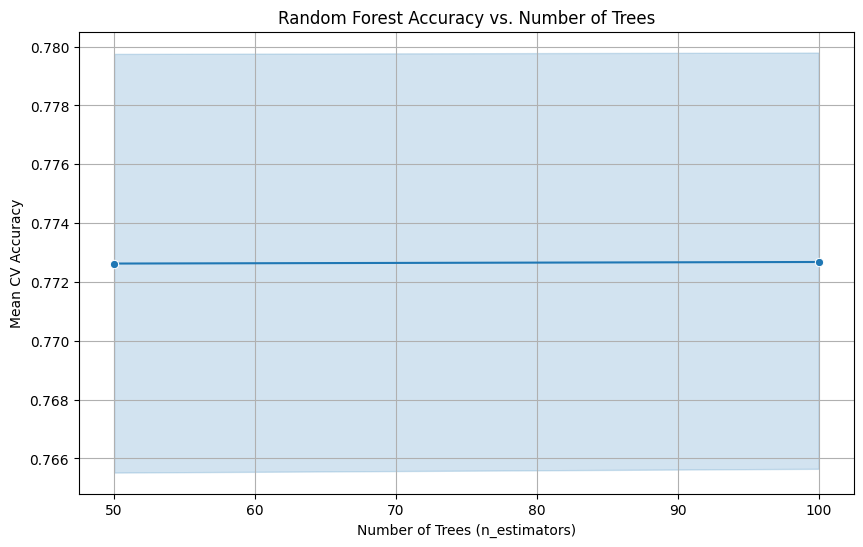

In [36]:
# Accuracy Curve
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
sns.lineplot(x=results['param_n_estimators'], y=results['mean_test_score'], marker='o')
plt.title("Random Forest Accuracy vs. Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Mean CV Accuracy")
plt.grid()
plt.show()

**6. Neural Network Classifier**

In [37]:
print("\nTraining Neural Network Classifier...")
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


Training Neural Network Classifier...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# Compile the Neural Network model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
# Calculate class weights
class_weights = {0: len(y_resampled) / (2 * sum(y_resampled == 0)),
                 1: len(y_resampled) / (2 * sum(y_resampled == 1))}

In [40]:
# Train the Neural Network model
y_train = y_train.reset_index(drop=True)  # Reset index to 0, 1, 2...
history = nn_model.fit(
    X_resampled, y_resampled, epochs=50, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights
)

Epoch 1/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7470 - loss: 0.5415 - val_accuracy: 0.4824 - val_loss: 0.7261
Epoch 2/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7613 - loss: 0.5251 - val_accuracy: 0.6171 - val_loss: 0.6997
Epoch 3/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7686 - loss: 0.5187 - val_accuracy: 0.5820 - val_loss: 0.7958
Epoch 4/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7674 - loss: 0.5217 - val_accuracy: 0.5481 - val_loss: 0.7640
Epoch 5/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7724 - loss: 0.5165 - val_accuracy: 0.5626 - val_loss: 0.7380
Epoch 6/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7728 - loss: 0.5165 - val_accuracy: 0.5582 - val_loss: 0.7777
Epoch 7/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7722 - loss: 0.5162 - val_accuracy: 0.6012 - val_loss: 0.7186
Epoch 8/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7743 - loss: 0.5152 - 

In [41]:
# Evaluate Neural Network
nn_predictions = (nn_model.predict(X_test) > 0.5).astype(int).flatten()
print("\nNeural Network Performance:")
print(classification_report(y_test, nn_predictions))
print(f"AUC-ROC Score: {roc_auc_score(y_test, nn_predictions):.2f}")

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Neural Network Performance:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7265
           1       0.44      0.53      0.48       971

    accuracy                           0.86      8236
   macro avg       0.69      0.72      0.70      8236
weighted avg       0.88      0.86      0.87      8236

AUC-ROC Score: 0.72


**7. Save Results**

In [42]:
# Save Random Forest Model
joblib.dump(rf_model, "random_forest_model.pkl")

['random_forest_model.pkl']

In [43]:
# Save Neural Network Model
nn_model.save("neural_network_model.h5")

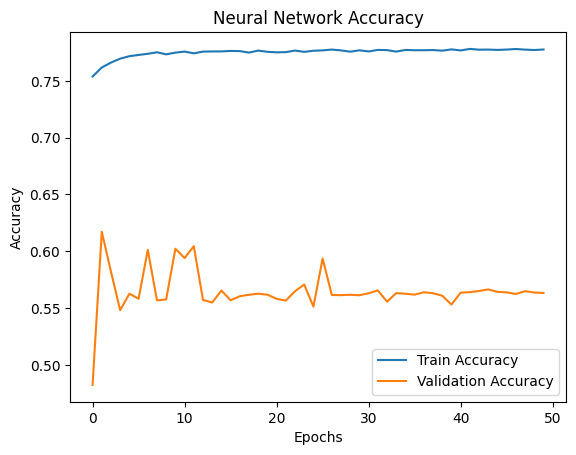

In [44]:
# Plot Neural Network Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

8. Comparison of Models